[2024-10-11 Fiddler](https://thefiddler.substack.com/p/will-you-top-the-leaderboard)
====================

The progress is $W = Pt$, where $P$ is uniformly distributed between 0 and 200 Watts,
and $t$ is uniformly distributed between 0 and 30 minutes.  Choose units where
$P=1$ is 200 Watts and $t=1$ is 30 minutes.  That means $W$ has some distribution between
$0$ and $1$.

The fraction of the leaderboard at less than $W$ is

In [1]:
W,P,t = var('W,P,t')
assume(W > 0)
assume(W < 1)
show(integral(integral(1, t, 0, 1), P, 0, W) + integral(integral(1, t, 0, W/P), P, W, 1))

-W*log(W) + W

In [2]:
f(W) = W - W*log(W)

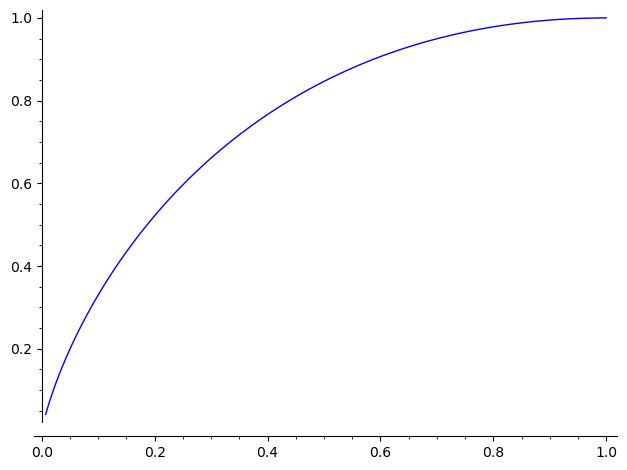

In [3]:
plot(f(W), W, 0, 1)

If I'm halfway up the leaderboard, my progress is

In [4]:
solve(f(W) == 1/2, W)

[W == -1/2/(log(W) - 1)]

That was unhelpful.  Turning to Wolfram Alpha, my progress is approximately 67 kJ.

In [5]:
W_half = e^(1+lambert_w(-1,-1/(2*e)))
show((W_half, f(W_half)))
(numerical_approx(W_half), 360*numerical_approx(W_half), numerical_approx(f(W_half)))

(e^(lambert_w(-1, -1/2*e^(-1)) + 1),
 -e^(lambert_w(-1, -1/2*e^(-1)) + 1)*log(e^(lambert_w(-1, -1/2*e^(-1)) + 1)) + e^(lambert_w(-1, -1/2*e^(-1)) + 1))

(0.186682308850837, 67.2056311863013, 0.500000000000000)

That means my progress at the end of my workout is approximately 134 kJ.

In [6]:
show(2*W_half)
(numerical_approx(2*W_half), 360*numerical_approx(2*W_half))

2*e^(lambert_w(-1, -1/2*e^(-1)) + 1)

(0.373364617701674, 134.411262372603)

And my position on the leaderboard would be

In [7]:
show(f(2*W_half))
(f(2*W_half),numerical_approx(f(2*W_half)))

-2*e^(lambert_w(-1, -1/2*e^(-1)) + 1)*log(2*e^(lambert_w(-1, -1/2*e^(-1)) + 1)) + 2*e^(lambert_w(-1, -1/2*e^(-1)) + 1)

(-2*e^(lambert_w(-1, -1/2*e^(-1)) + 1)*log(2*e^(lambert_w(-1, -1/2*e^(-1)) + 1)) + 2*e^(lambert_w(-1, -1/2*e^(-1)) + 1),
 0.741203367919243)

#### Added bonus problem
I'm not sure what the added bonus problem is asking for.  Maybe it's where someone
who has been going 15 minutes at 200 Watts would be on the leaderboard, which is

In [8]:
(f(1/2).simplify(),numerical_approx(f(1/2)))

(1/2*log(2) + 1/2, 0.846573590279973)

Extra credit
------------

My expected progress at some random time is

In [9]:
integral(integral(P*t, t, 0, 1), P, 0, 1)

1/4

or about 90 kJ, which would have a leaderboard position of

In [10]:
(f(1/4).simplify(),numerical_approx(f(1/4)))

(1/2*log(2) + 1/4, 0.596573590279973)

However, my expected leaderboard position is

In [11]:
assume(P>0)
integral(integral(f(P*t),t,0,1),P,0,1)

1/2

[Simulations](20241011.go) agree.

    $ go run 20241011.go
    <W>=0.250033
    <L>=0.500048